In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head(11)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\Moosa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

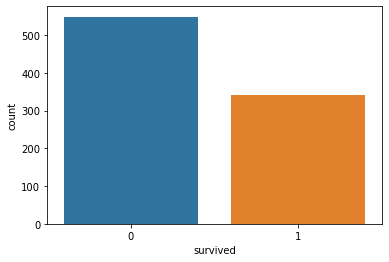

In [7]:
sns.countplot(titanic['survived'])


C:\Users\Moosa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moosa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moosa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Moosa\anaconda3\lib\si

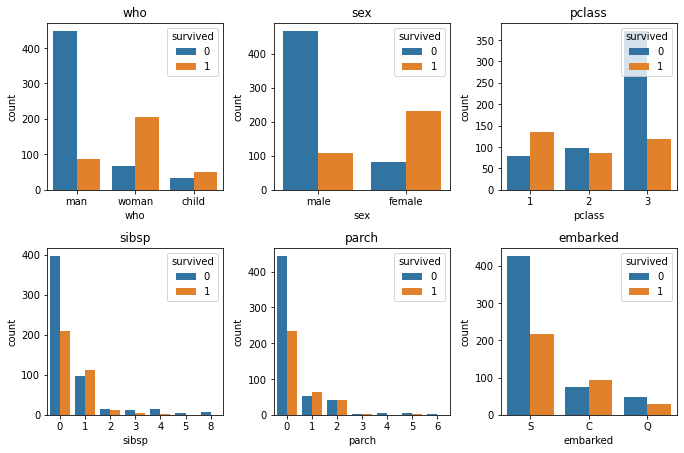

In [8]:
cols = ['who', 'sex','pclass','sibsp','parch','embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *3.2,n_rows*3.2))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]],hue = titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')
plt.tight_layout()

In [9]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
titanic.pivot_table('survived',index= 'sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

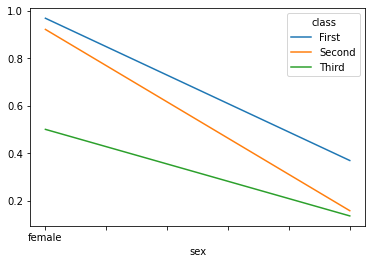

In [11]:
 titanic.pivot_table('survived',index= 'sex', columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

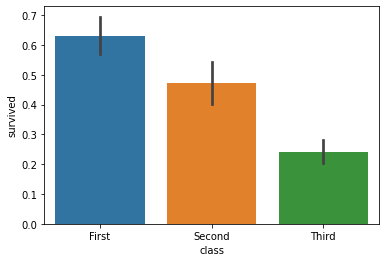

In [12]:
sns.barplot(x='class',y='survived', data=titanic)

In [13]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age,],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

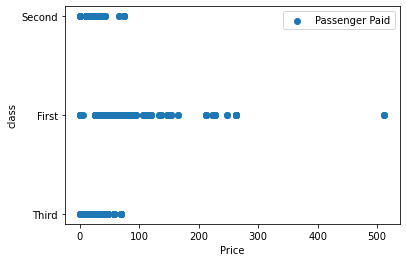

In [14]:
plt.scatter(titanic['fare'],titanic['class'],label='Passenger Paid')
plt.ylabel('class')
plt.xlabel('Price')
plt.legend()
plt.show()

In [15]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
for val in titanic:
    print (titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
titanic = titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis = 1)
titanic = titanic.dropna(subset = ['embarked','age'])

In [18]:
titanic.shape

(712, 8)

In [19]:
titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [22]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)

titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [24]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [25]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [26]:
X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)

In [31]:
acc = accuracy_score(Y_test,Y_pred)*100

In [32]:
print (acc)

77.62237762237763


In [33]:
def models(X_train, Y_train):
    #logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    
    #KNeighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,Y_train)
    
    # SVC
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear')
    svc_lin.fit(X_train,Y_train)
    
    #SVC 
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf')
    svc_rbf.fit(X_train,Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    GNB = GaussianNB()
    GNB.fit(X_train,Y_train)
    
    # Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train,Y_train)
    
    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion='entropy')
    forest.fit(X_train,Y_train)
    
    #accuracy
    print ('[0]Logistic Ression Training Accuracy:', log.score(X_train,Y_train))
    print ('[1]KNN Training Accuracy:', knn.score(X_train,Y_train))
    print ('[2]svc linear Accuracy:', svc_lin.score(X_train,Y_train))
    print ('[3]svc_rbf linear Accuracy:', svc_rbf.score(X_train,Y_train))
    print ('[4]GNB Training Accuracy:', GNB.score(X_train,Y_train))
    print ('[5]decisiontree Accuracy:', tree.score(X_train,Y_train))
    print ('[6]Random forest Training Accuracy:', forest.score(X_train,Y_train))
    return log, knn, svc_lin , GNB, tree, forest

In [34]:
model = models(X_train,Y_train)

C:\Users\Moosa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Ression Training Accuracy: 0.827768014059754
[1]KNN Training Accuracy: 0.7768014059753954
[2]svc linear Accuracy: 0.7908611599297012
[3]svc_rbf linear Accuracy: 0.6695957820738138
[4]GNB Training Accuracy: 0.8066783831282952
[5]decisiontree Accuracy: 0.9912126537785588
[6]Random forest Training Accuracy: 0.9753954305799648


In [38]:
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print (cm)
    acc_score = (TP+TN)/(TP+TN+FN+FP)
    print ('Model[{}] Testing Accuracy = "{}"'.format(i,acc_score))
    print ()

[[71 13]
 [25 34]]
Model[0] Testing Accuracy = "0.7342657342657343"

[[72 12]
 [27 32]]
Model[1] Testing Accuracy = "0.7272727272727273"

[[69 15]
 [23 36]]
Model[2] Testing Accuracy = "0.7342657342657343"

[[70 14]
 [22 37]]
Model[3] Testing Accuracy = "0.7482517482517482"

[[70 14]
 [19 40]]
Model[4] Testing Accuracy = "0.7692307692307693"

[[70 14]
 [23 36]]
Model[5] Testing Accuracy = "0.7412587412587412"



In [48]:
forest = model[5]
importance = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_, 3)})
importance = importance.sort_values('importance',ascending = False).set_index('feature')
importance

,importance
feature,
age,0.302
fare,0.265
sex,0.241
pclass,0.075
sibsp,0.059
parch,0.038
embarked,0.021


<AxesSubplot:xlabel='feature'>

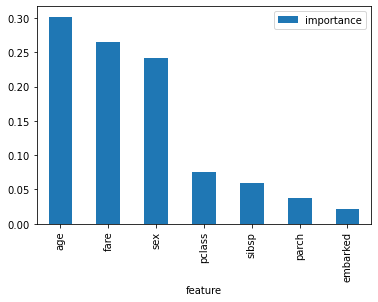

In [49]:
importance.plot.bar()

In [62]:
my_survival = [[3, 0,70,8,6,0,0]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fitted = sc.fit(X_train)
my_survuval_scaled = fitted.transform(my_survival)
pred = model[5].predict(my_survuval_scaled)
print (pred)
if pred == 0:
    print ("you lost")
else:
    print ("You make it")

[1]
You make it
